**Executive Summary**

Diabetes, a medical condition characterized by insufficient insulin production in Type-1 diabetes and insulin resistance in Type-2 diabetes, is highly prevalent among the population. Hospital readmission rates for diabetic patients pose a significant concern in the United States, with healthcare costs exceeding $250 million in 2011. Diabetes, being a chronic condition with no specific cure, necessitates effective management.

**Objective:**
Hospital readmission rates have become a key indicator of healthcare quality and cost-effectiveness. Excessive readmissions can result in financial penalties for hospitals, highlighting deficiencies in the healthcare system. Thus, it is imperative for hospitals to prioritize reducing readmission rates. The aim of this study is to identify the critical factors influencing diabetes-related readmissions and predict the likelihood of patient readmission.

**Approach:**
The dataset used for this analysis is sourced from the UCI website, encompassing a decade of patient data from 130 hospitals. Python is employed for data analysis, utilizing libraries such as scikit-learn, seaborn, and matplotlib. Various machine learning techniques, including Logistic Regression and Random Forest, are applied for classification and regression tasks to achieve the study's objectives.

# Loading the data

In [ ]:
# Import libraries needed,
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the data using pandas,
dataoriginal = pd.read_csv("/content/drive/MyDrive/Data Science/diabetic_data.csv")
print(dataoriginal.shape)

#Exploring the data further,
print(dataoriginal.info())
print(dataoriginal.describe())


(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int

In [ ]:
fr# Let's see how the data looks like,

data weoriginal.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Cleaning

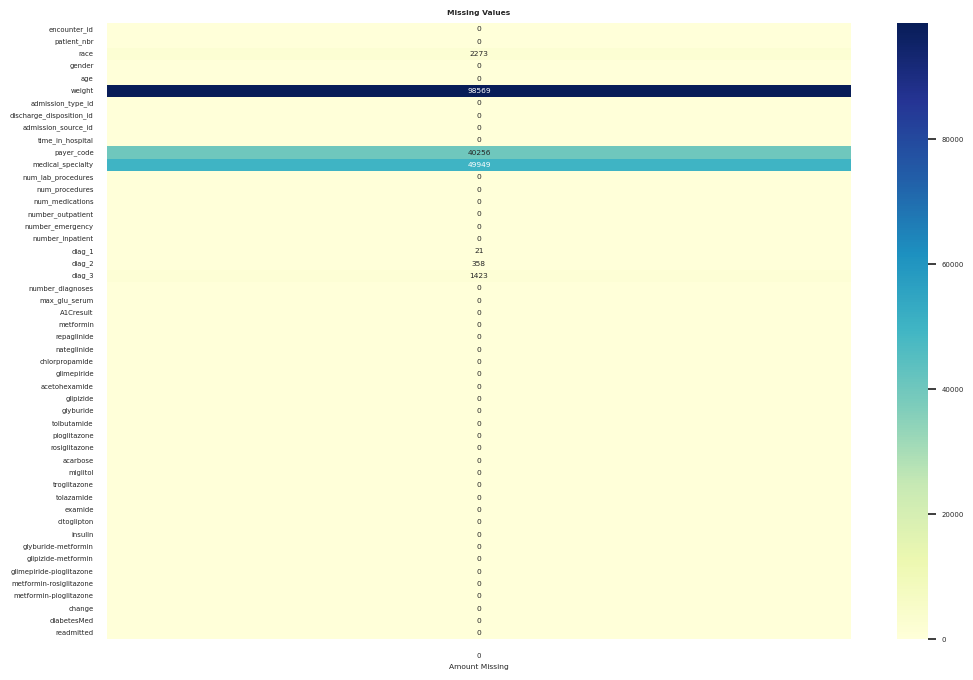

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the original dataset
datacopy = dataoriginal.copy()

# Replace '?' with NaN values
datacopy.replace('?', np.NaN, inplace=True)

# Check for missing values
nacheck = datacopy.isnull().sum()

# Plot the missing values
plt.figure(figsize=(12, 8))
plt.title('Missing Values', fontweight='bold')
ax = sns.heatmap(nacheck.to_frame(), annot=True, fmt='d', cmap='YlGnBu', cbar=True)
ax.set_xlabel('Amount Missing')
plt.show()


In [ ]:
#From the above we can see that "Weight,payer_code and medical_specialty" have a lot of missing values thus it is
#best to remove these values from the dataset.

#Dropping these columns,

datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)


In [ ]:
datacopy['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [ ]:
# We can see that there are three types of values:- 'NO','<30','>30'. So, to make it a categorical variable so that different
# ML techniques can be applies.

datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)


In [ ]:
datacopy.groupby('30readmit').size()

30readmit
0    54864
1    46902
dtype: int64

In [ ]:
# Removing the pateints from the dataset that are dead.

datacopy = datacopy[((datacopy.discharge_disposition_id != 11) &
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) &
                                          (datacopy.discharge_disposition_id != 19) &
                                          (datacopy.discharge_disposition_id != 20) &
                                          (datacopy.discharge_disposition_id != 21))]

In [ ]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


# Performing Exploratory Data Analysis (EDA)

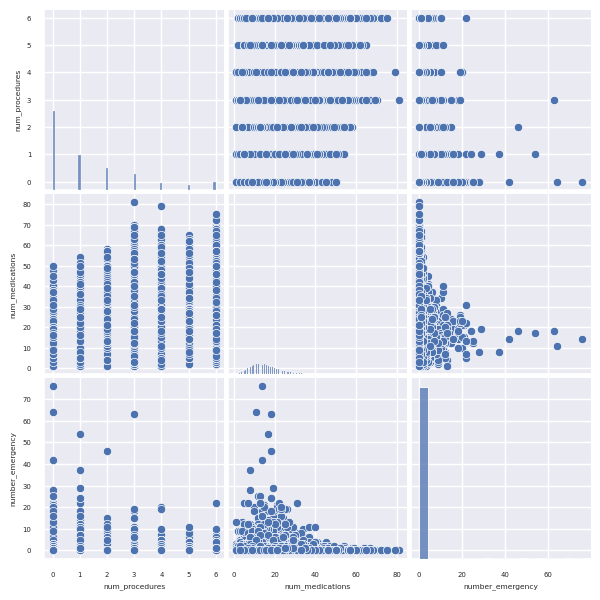

In [ ]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'datacopy' containing the relevant columns
data = datacopy[['num_procedures', 'num_medications', 'number_emergency']]

# Create a pairplot
sns.pairplot(data, height=2)
plt.show()  # Display the plot

From the above, we can see that there is no problem of multi-collinearity.
We can also see that as the number_emergency increases the num_medication decreases.

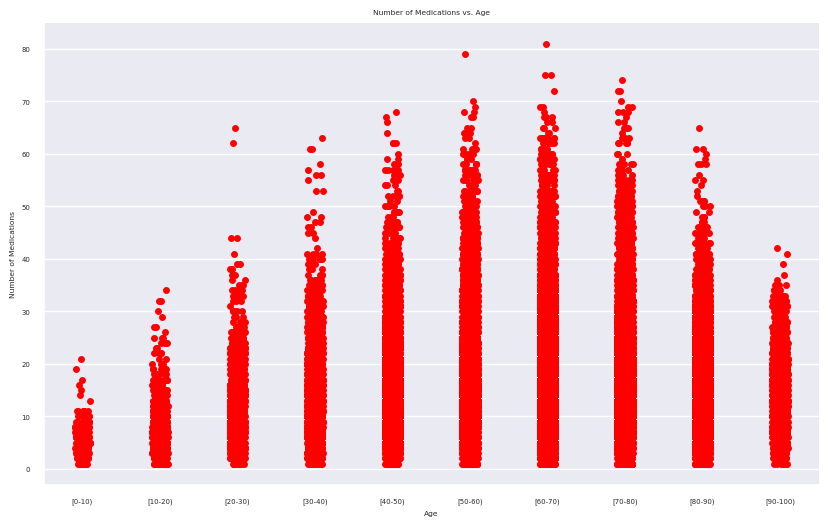

In [ ]:
#Let's try to see how the age and number of medicines vary,
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

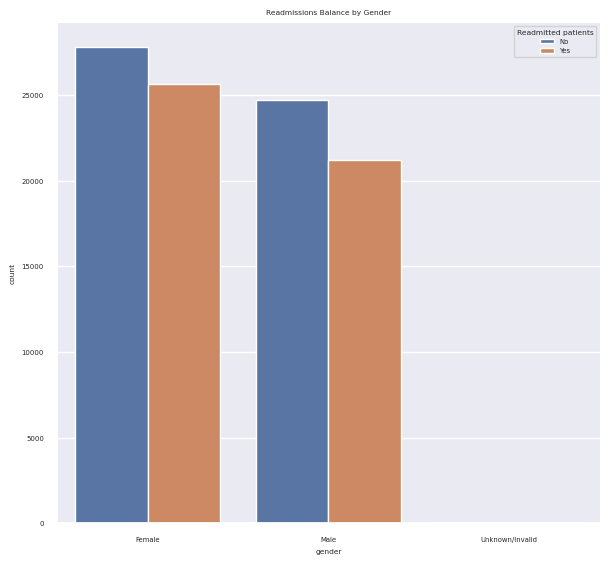

In [ ]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = datacopy)

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

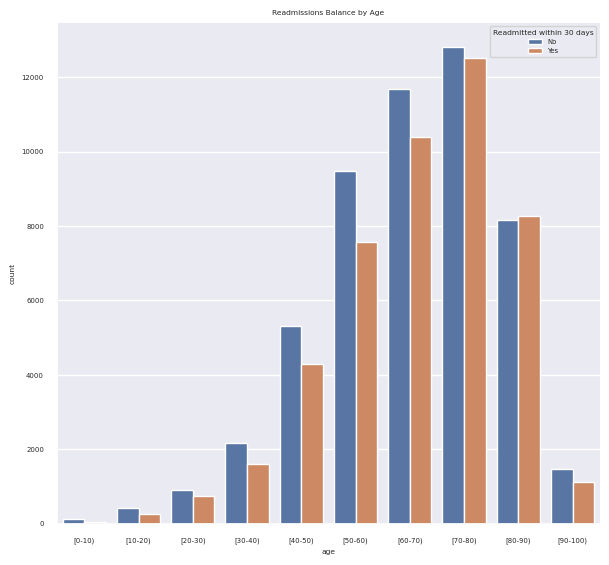

In [ ]:
#Relation between age and readmission,

b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = datacopy, order = b_sort)

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

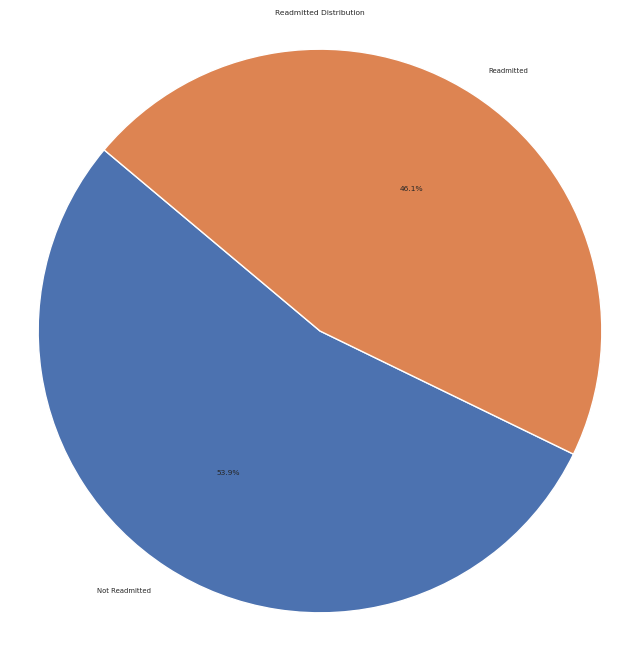

In [ ]:
import matplotlib.pyplot as plt

# Data
readmitted_counts = [54864, 46902]
labels = ['Not Readmitted', 'Readmitted']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(readmitted_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Readmitted Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()


Analysis of Entire Sample Space

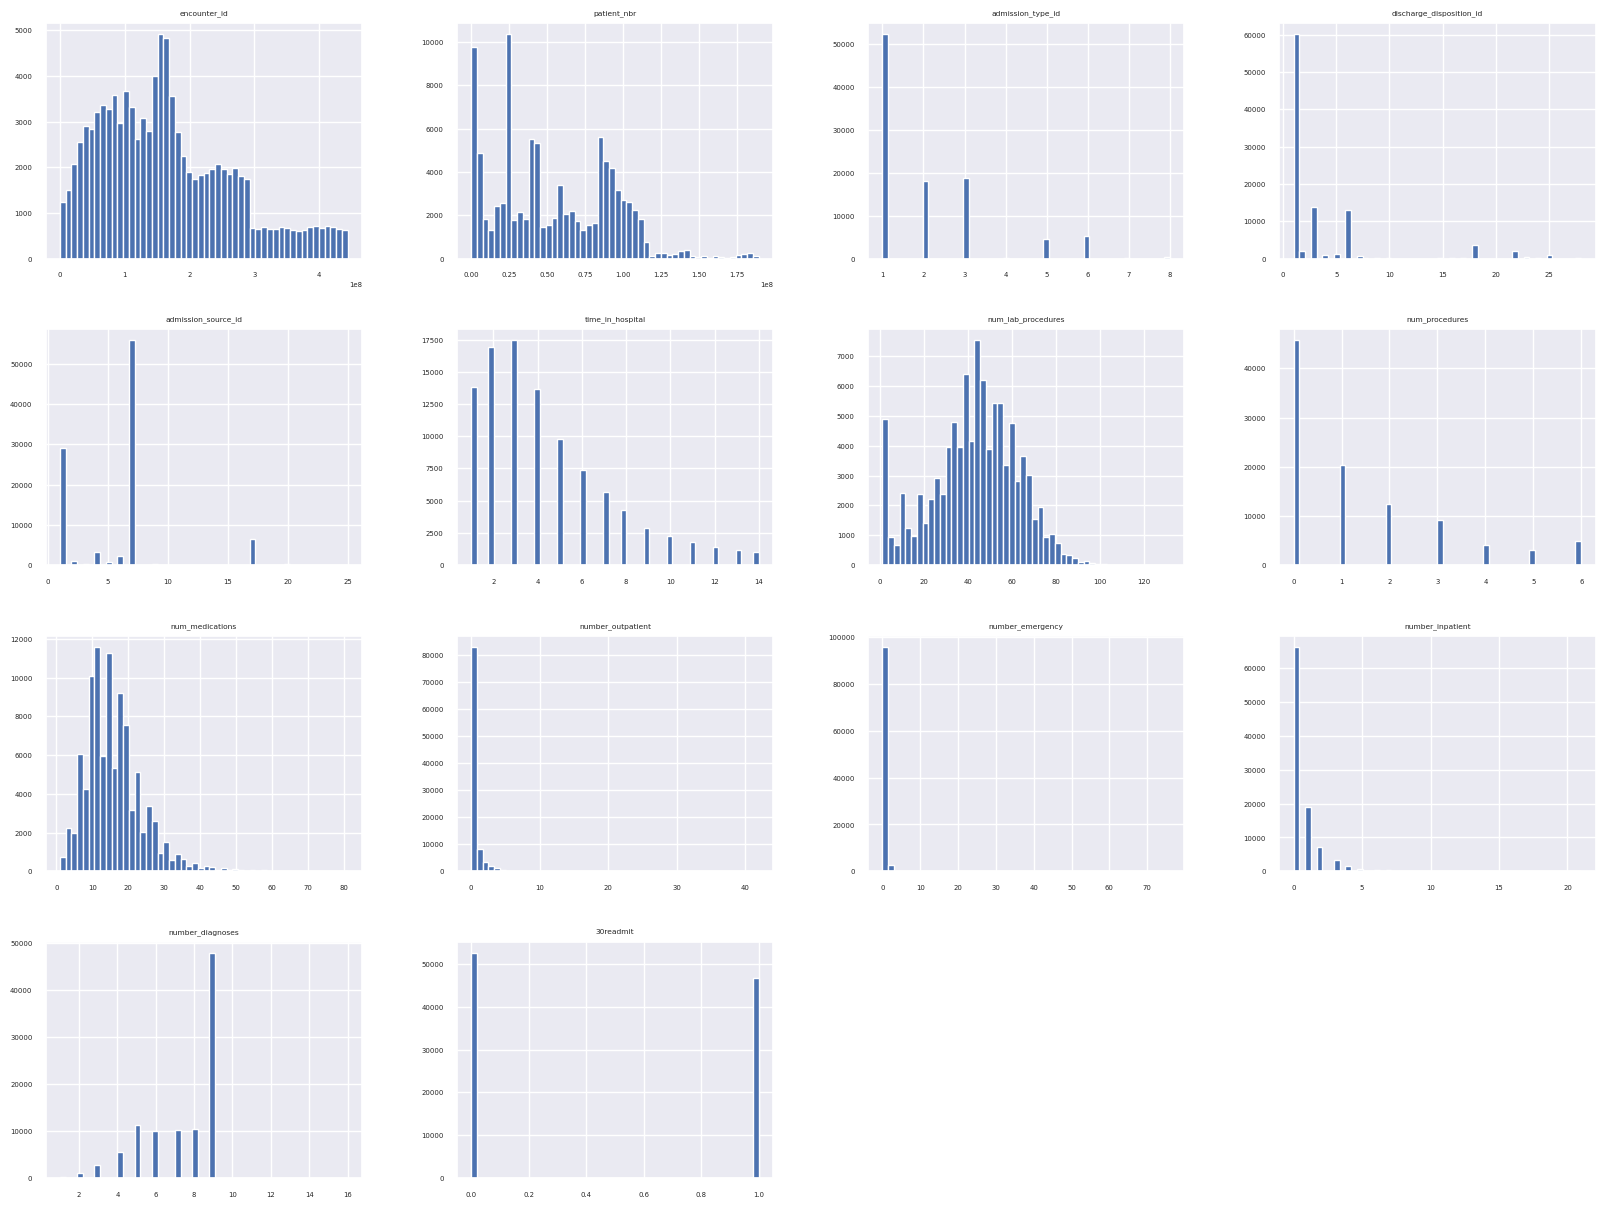

In [ ]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
datacopy.hist(bins=50, figsize=(20,15))
plt.show()

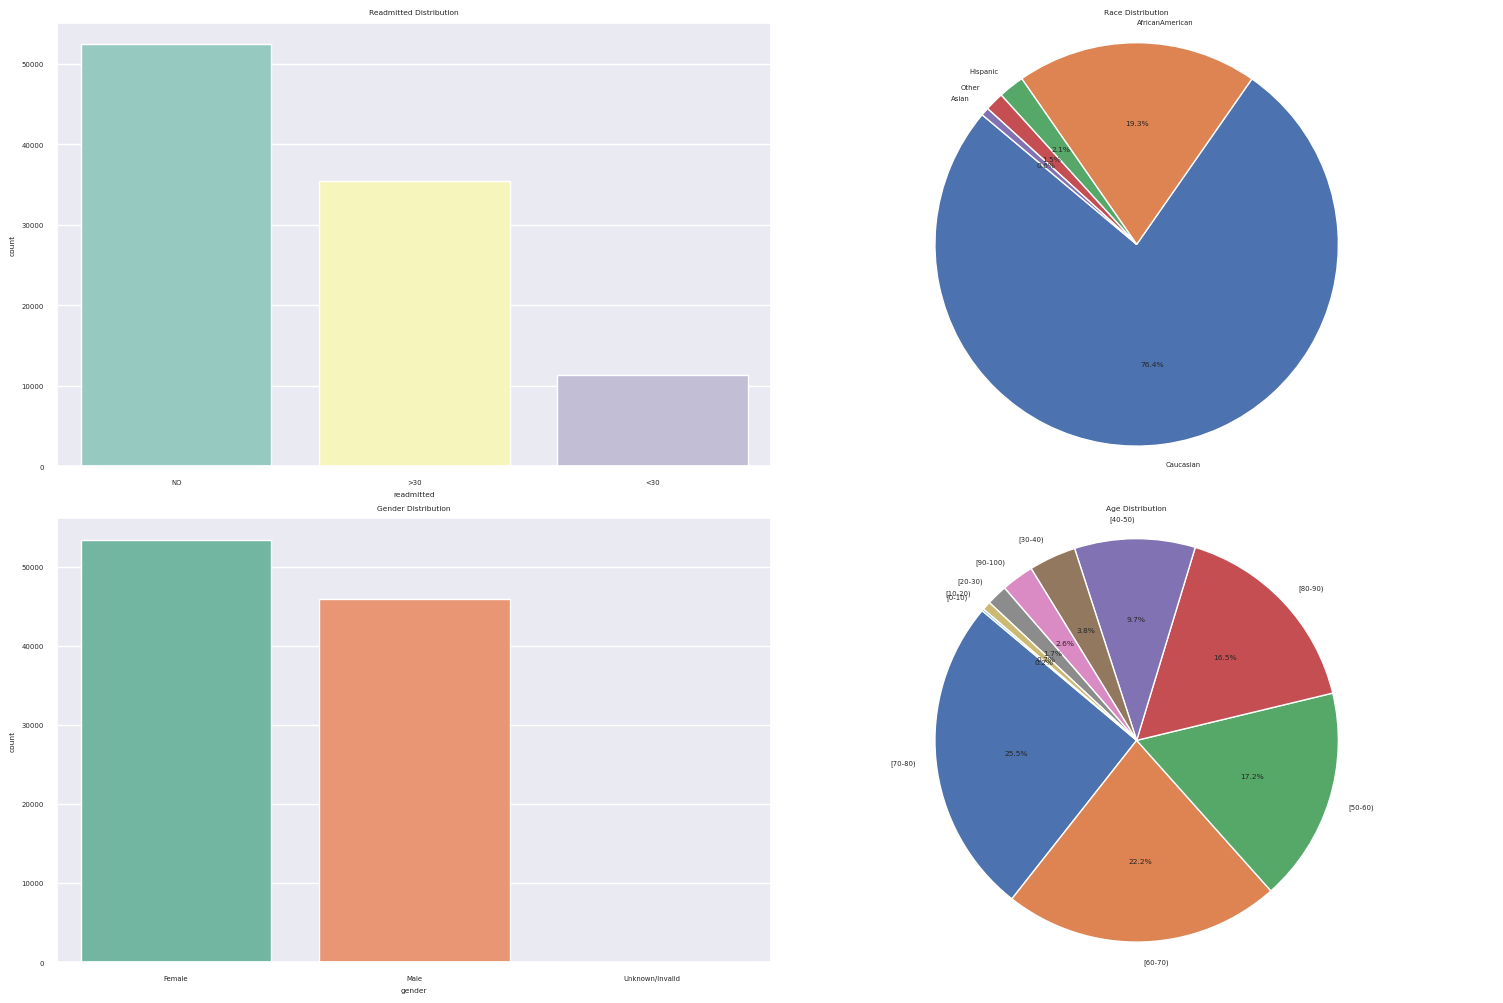

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10), ncols=2, nrows=2)

# Convert 'readmitted' to a count plot with multiple colors
sns.countplot(data=datacopy, x='readmitted', ax=ax[0][0], palette='Set3')
ax[0][0].set_title('Readmitted Distribution')

# Convert 'gender' to a count plot with multiple colors
sns.countplot(data=datacopy, x='gender', ax=ax[1][0], palette='Set2')
ax[1][0].set_title('Gender Distribution')

# Convert 'age' to a pie chart
age_counts = datacopy['age'].value_counts()
ax[1][1].set_title('Age Distribution')
ax[1][1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
ax[1][1].axis('equal')

# Convert 'race' to a pie chart
race_counts = datacopy['race'].value_counts()
ax[0][1].set_title('Race Distribution')
ax[0][1].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
ax[0][1].axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming you have a DataFrame called 'datacopy' with columns 'gender' and 'age'

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('', '<b>Distribution of Female Ages</b>', '<b>Distribution of Male Ages</b>'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie", "rowspan": 2}, {"type": "histogram"}],
           [None, {"type": "histogram"}]],
)

# Create Pie Chart for Gender Distribution
gender_counts = datacopy['gender'].value_counts()
fig.add_trace(
    go.Pie(
        values=gender_counts.values,
        labels=['<b>Female<b>', '<b>Male<b>', '<b>Other<b>'],
        hole=0.3,
        pull=[0, 0.08, 0.3],
        marker_colors=['burlywood', 'darkblue', 'green'],
        textposition='inside'
    ),
    row=1, col=1
)

# Create Histogram for Female Ages (sorted)
female_data = datacopy.query('gender=="Female"')['age']
female_data_sorted = female_data.sort_values()

fig.add_trace(
    go.Histogram(
        x=female_data_sorted,
        marker=dict(color='burlywood'),
        name='Female Ages',
        xbins=dict(start=0, end=100, size=1)  # Adjust the bin range
    ),
    row=1, col=2
)

# Create Histogram for Male Ages (sorted)
male_data = datacopy.query('gender=="Male"')['age']
male_data_sorted = male_data.sort_values()

fig.add_trace(
    go.Histogram(
        x=male_data_sorted,
        marker=dict(color='darkblue'),
        name='Male Ages',
        xbins=dict(start=0, end=100, size=1)  # Adjust the bin range
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Inference<b>",
)

# Show the plot
fig.show()


Distribution of Insulin

<ipython-input-253-69676bd7cd14>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




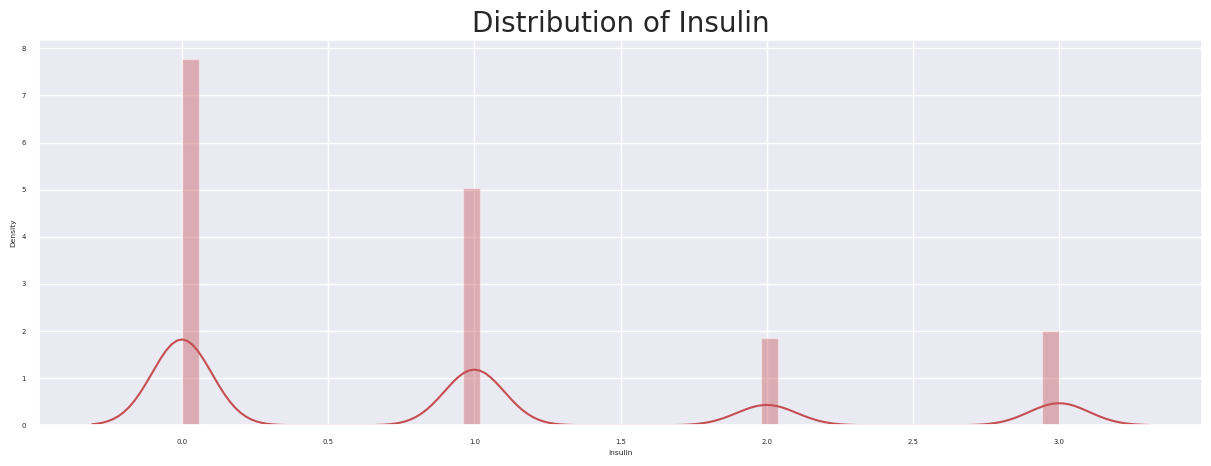

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'datacopy' with a categorical column 'insulin'

# Encode the 'insulin' column (example using label encoding)
# You can replace this with one-hot encoding or other encoding methods as needed
insulin_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
datacopy['insulin'] = datacopy['insulin'].map(insulin_mapping)

# Create a distribution plot for the encoded values
plt.subplots(figsize=(15, 5))
sns.distplot(datacopy['insulin'], color='r')
plt.title('Distribution of Insulin', fontsize=20)
plt.show()


Distribution of Age

<ipython-input-254-8fed22ce04af>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




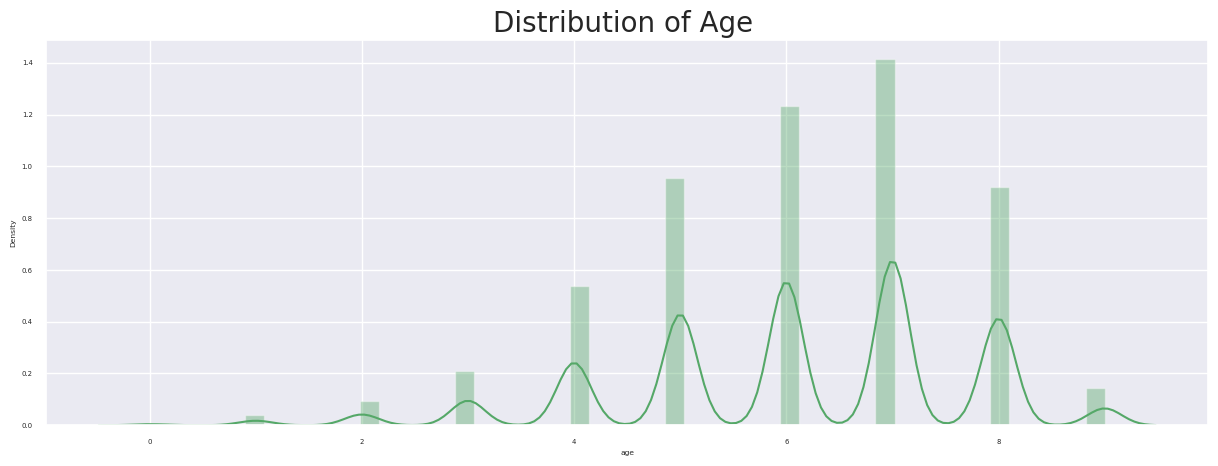

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'datacopy' with a categorical column 'age'

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'age' column and store it in a new column 'age_encoded'
datacopy['age'] = label_encoder.fit_transform(datacopy['age'])

# Create a distribution plot for the encoded values
plt.subplots(figsize=(15, 5))
sns.distplot(datacopy['age'], color='g')
plt.title('Distribution of Age ', fontsize=20)
plt.show()


**Spearman**

<ipython-input-255-f969df0f9681>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



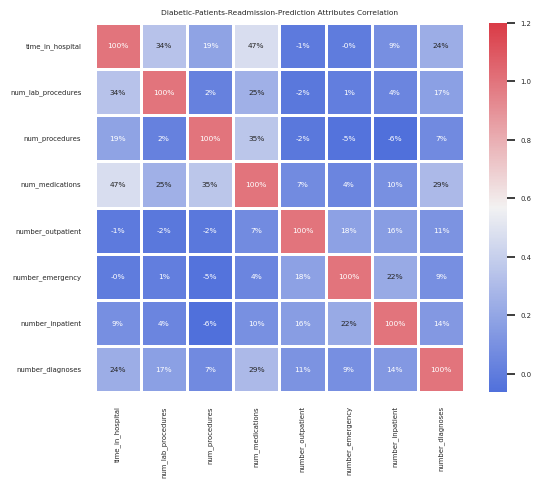

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove extra whitespace and unnecessary commas from column names
columns_to_correlate = [
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "diag_1",
    "diag_2",
    "diag_3",
    "number_diagnoses"

]

# Calculate the Spearman correlation matrix
correlation_matrix = dataoriginal[columns_to_correlate].corr(method='spearman')

# Set font scale for the plot
sns.set(font_scale=0.45)

# Create the heatmap
plt.title('Diabetic-Patients-Readmission-Prediction Attributes Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(correlation_matrix, vmax=1.2, annot=True, square=True, cmap=cmap, fmt='.0%', linewidths=2)

# Show the plot
plt.show()


CHECK FOR OUTLIERS IN OUR DATA

<Axes: >

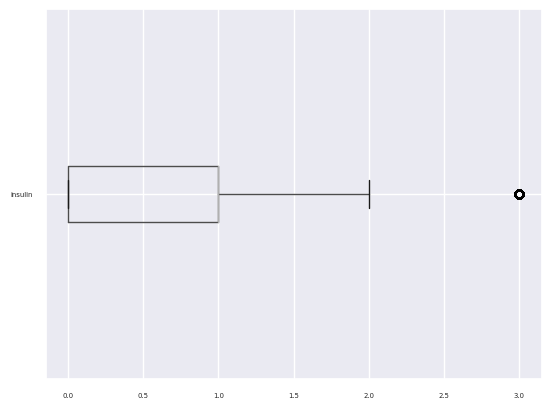

In [ ]:
#Insulin FEATURE:
datacopy.boxplot(column='insulin',vert=False)

<Axes: >

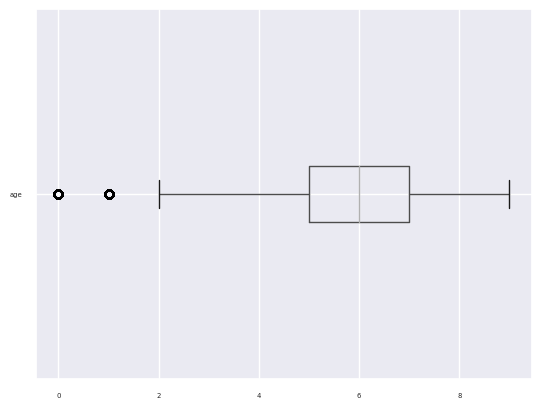

In [ ]:
#Age:
datacopy.boxplot(column='age',vert=False)

# Prediction using ML Models

Before applying logistic regression, we will have to make the data fit for performing logistic regression.


In [ ]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,

numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [ ]:
# Substituting 0 and unknown,

datacopy[numcolumn] = datacopy[numcolumn].fillna(0)
datacopy[objcolumn] = datacopy[objcolumn].fillna("unknown")


In [ ]:
datacopy.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,0,6,25,1,1,41,...,0,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,1,1,1,7,3,59,...,2,No,No,No,No,No,Ch,Yes,>30,1


In [ ]:
#Encoding the data,

def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]


    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})
            count += 1
    return dictcout


def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = []
        for num in df[col]:
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else:
                lkup = num.split('.')[0]
                temp.append(codes[lkup])
        df.loc[:, col] = temp
    return df


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
datacopy[listcol] = codemap(datacopy[listcol], codes)

<ipython-input-261-8a1342ad6543>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-261-8a1342ad6543>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-261-8a1342ad6543>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Now let's look at the dataset again and drop the irrelevant columns,

datacopy.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender  age  \
0            2278392      8222157        Caucasian  Female    0   
1             149190     55629189        Caucasian  Female    1   
2              64410     86047875  AfricanAmerican  Female    2   
3             500364     82442376        Caucasian    Male    3   
4              16680     42519267        Caucasian    Male    4   
...              ...          ...              ...     ...  ...   
101761     443847548    100162476  AfricanAmerican    Male    7   
101762     443847782     74694222  AfricanAmerican  Female    8   
101763     443854148     41088789        Caucasian    Male    7   
101764     443857166     31693671        Caucasian  Female    8   
101765     443867222    175429310        Caucasian    Male    7   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1        

In [ ]:
data1 = datacopy.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)


In [ ]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,0,25,1,1,41,0,1,0,...,No,0,No,No,No,No,No,No,No,0
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,No,2,No,No,No,No,No,Ch,Yes,1


#### Normalization of data

In [ ]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,30readmit
count,99343.000000,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000,99343.000000
mean,6.074429,3.517882,5.731083,6.894932e-17,-8.632969e-17,-4.756358e-17,1.773800e-17,-7.438515e-18,-5.650411e-17,-2.660700e-17,1.773800e-16,0.883474,0.471256
std,1.594518,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.021448,0.499176
min,0.000000,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000,0.000000
25%,5.000000,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000,0.000000
50%,6.000000,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,1.000000,0.000000
75%,7.000000,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000,1.000000
max,9.000000,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,3.000000,1.000000


In [ ]:
#Let's store readmitted in y and rest of the columns in X,

Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

##### Splitting the data into training and vallidation data sets. The training data will contain 70 % of the data and validation will contain remaining 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0 , shuffle = True)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (69540, 157)
Number transactions Y_train dataset:  (69540,)
Number transactions X_test dataset:  (29803, 157)
Number transactions Y_test dataset:  (29803,)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
#ravel() used to flatten
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 32767
Before OverSampling, counts of label '0': 36773 

After OverSampling, the shape of train_X: (73546, 157)
After OverSampling, the shape of train_y: (73546,) 

After OverSampling, counts of label '1': 36773
After OverSampling, counts of label '0': 36773


## **BASELINE MODEL**

In [ ]:
!pip install dabl
import dabl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
accuracies = {}

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assuming you have a dataset 'X' and labels 'Y' that you want to split and oversample
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Apply random oversampling to balance the training data
ros = RandomOverSampler(random_state=42)
X_train_res, Y_train_res = ros.fit_resample(X_train, Y_train)

# Now you can use X_train_res and Y_train_res in your dabl.SimpleClassifier code
sc = dabl.SimpleClassifier().fit(X_train_res, Y_train_res)
print("Accuracy score", sc.score(X_test, Y_test))
acc = sc.score(X_test, Y_test) * 100
accuracies['Base Model'] = acc
print("Test Accuracy of Base Model: {:.2f}%".format(acc))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.10/di

Running DummyClassifier()
accuracy: 0.500 average_precision: 0.500 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.333
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.500 average_precision: 0.500 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.333

Running GaussianNB()
accuracy: 0.512 average_precision: 0.611 roc_auc: 0.637 recall_macro: 0.512 f1_macro: 0.376
=== new best GaussianNB() (using recall_macro):
accuracy: 0.512 average_precision: 0.611 roc_auc: 0.637 recall_macro: 0.512 f1_macro: 0.376

Running MultinomialNB()
accuracy: 0.577 average_precision: 0.601 roc_auc: 0.608 recall_macro: 0.577 f1_macro: 0.577
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.577 average_precision: 0.601 roc_auc: 0.608 recall_macro: 0.577 f1_macro: 0.577

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.607 average_precision: 0.562 roc_auc: 0.607 recall_macro: 0.607 f1_macro: 0.597
=== new best DecisionTreeClassifier(class_weight='balanced', 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



Accuracy score 0.6209777539173909
Test Accuracy of Base Model: 62.10%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



# **Naive Bayes**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Assuming you have your training and test data (Xtrain, Ytrain, Xtest, Ytest)

# Create and fit a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_res, Y_train_res)

# Make predictions on the test data
Ynaive_bayes_pred = naive_bayes_model.predict(X_test)



In [ ]:
# Compute the confusion matrix
confusion = confusion_matrix(Y_test, Ynaive_bayes_pred)

print(confusion)


[[ 3241 12513]
 [ 1732 12317]]


In [ ]:
# Calculate accuracy
accuracy = naive_bayes_model.score(X_test, Y_test)
accuracy_in_percentage=accuracy*100;
print("Test Accuracy of Naive Bayes Algorithm: {:.2f}%".format(accuracy_in_percentage))

Test Accuracy of Naive Bayes Algorithm: 52.20%


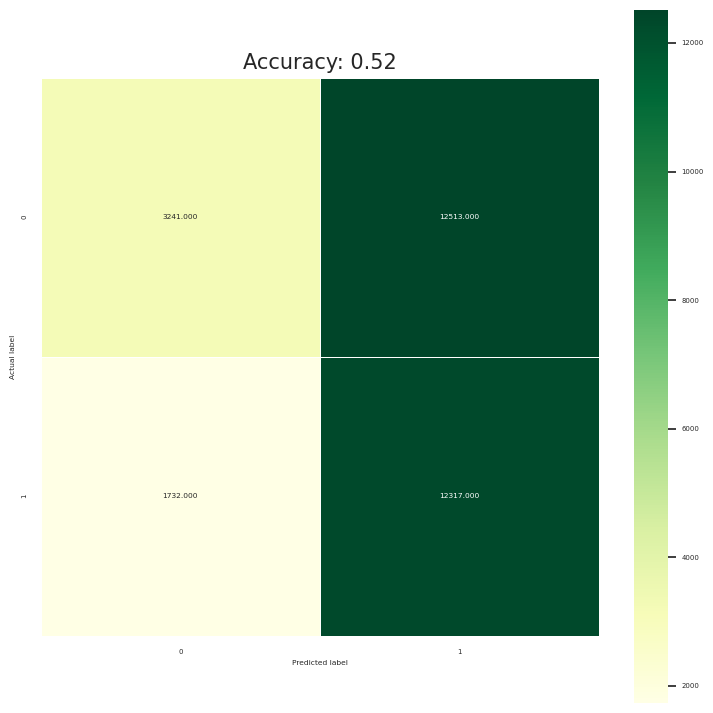

In [ ]:
# Create a heatmap for the confusion matrix with accuracy in the title
plt.figure(figsize=(9, 9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='YlGn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy: {:.2f}'.format(accuracy)
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
report = classification_report(Y_test, Ynaive_bayes_pred, target_names=['NO', 'YES'])

# Print the classification report
print("Classification Report for Naive Bayes:")
print(report)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          NO       0.65      0.21      0.31     15754
         YES       0.50      0.88      0.63     14049

    accuracy                           0.52     29803
   macro avg       0.57      0.54      0.47     29803
weighted avg       0.58      0.52      0.46     29803



Precision measures the accuracy of postive predictions while recall describes the completeness of positive predictions.

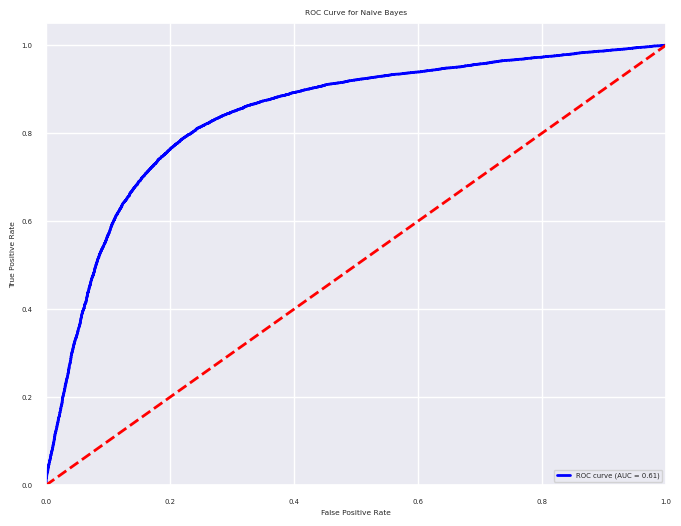

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate predicted probabilities for the positive class
Yproba = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
roc_auc = roc_auc_score(Y_test, Yproba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


# Logistic Regression

In [ ]:
# create model logistic as logistic regression using Sklearn
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(X_train_res, Y_train_res)
Ylog = logisticreg.predict(X_test)

In [ ]:
# Checking the accuracy of the model
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(X_test, Y_test))

 The accuracy of the Logistic regression model: 0.6157098278696775


In [ ]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Ylog))

[[10951  4803]
 [ 6650  7399]]


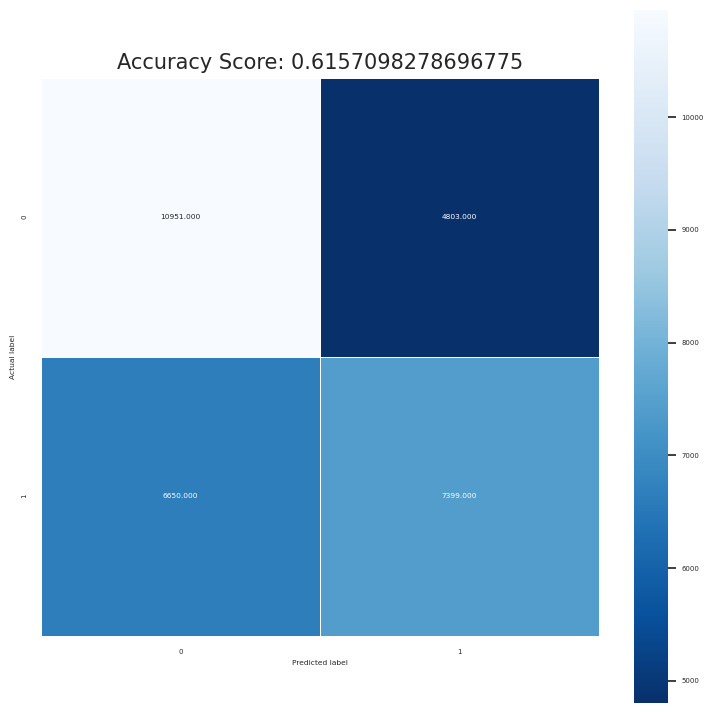

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Y_test, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.62      0.70      0.66     15754
         YES       0.61      0.53      0.56     14049

    accuracy                           0.62     29803
   macro avg       0.61      0.61      0.61     29803
weighted avg       0.61      0.62      0.61     29803



In [ ]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(X_test)

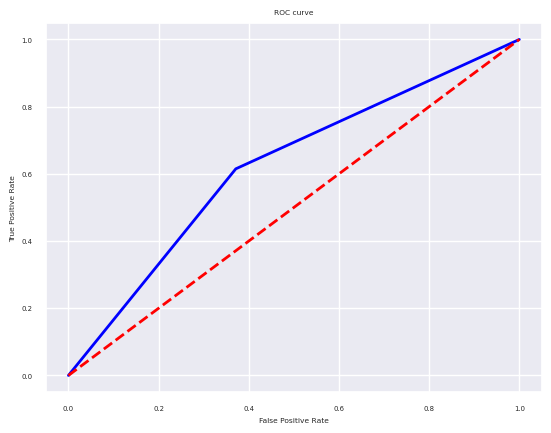

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(X_train),Y_train,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

##### As seen from the above, the performance of our model is average, not too great. So, let's go ahead and see other models.

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(X_train_res, Y_train_res)
Yrandforest = random_forest.predict(X_test)

In [ ]:
#Calculating the score,
scorey =random_forest.predict_proba(X_test)[:,1]
rfpr, rtpr, thresholds = roc_curve(Y_test, scorey)

In [ ]:
#Checking the accuracy,
random_forest_accuracy=random_forest.score(X_test, Y_test)
print(" Accuracy of Randomeforest classification: ", random_forest_accuracy)

 Accuracy of Randomeforest classification:  0.6229238667248264


In [ ]:
#Printing the confusion matrix,
print(confusion_matrix(Y_test, Yrandforest))

[[10722  5032]
 [ 6206  7843]]


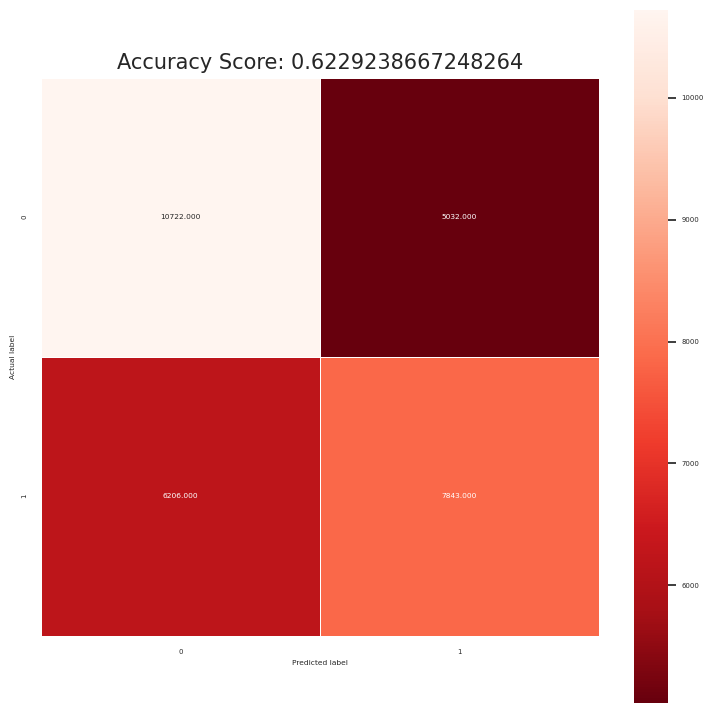

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

              precision    recall  f1-score       support
NO             0.633388  0.680589  0.656141  15754.000000
YES            0.609165  0.558260  0.582603  14049.000000
accuracy       0.622924  0.622924  0.622924      0.622924
macro avg      0.621277  0.619425  0.619372  29803.000000
weighted avg   0.621970  0.622924  0.621475  29803.000000


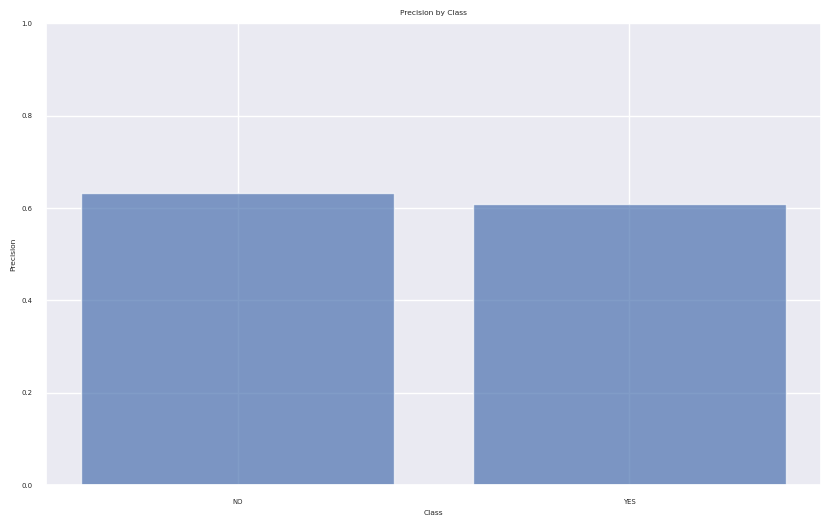

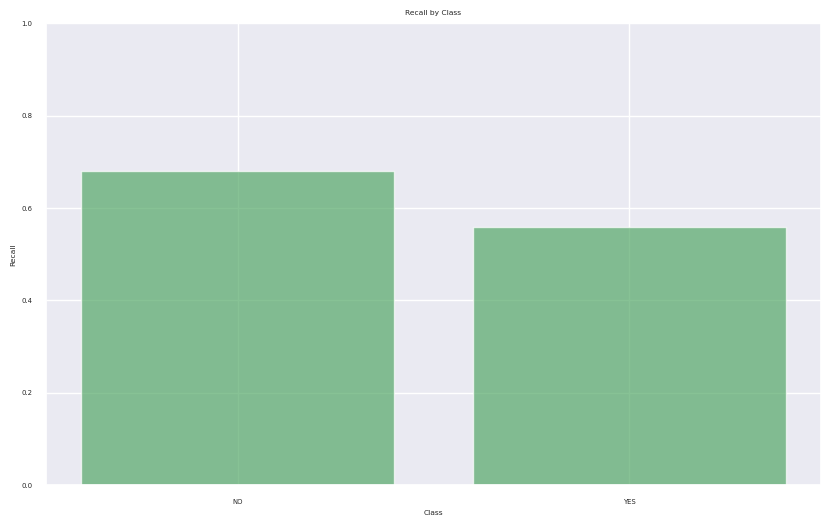

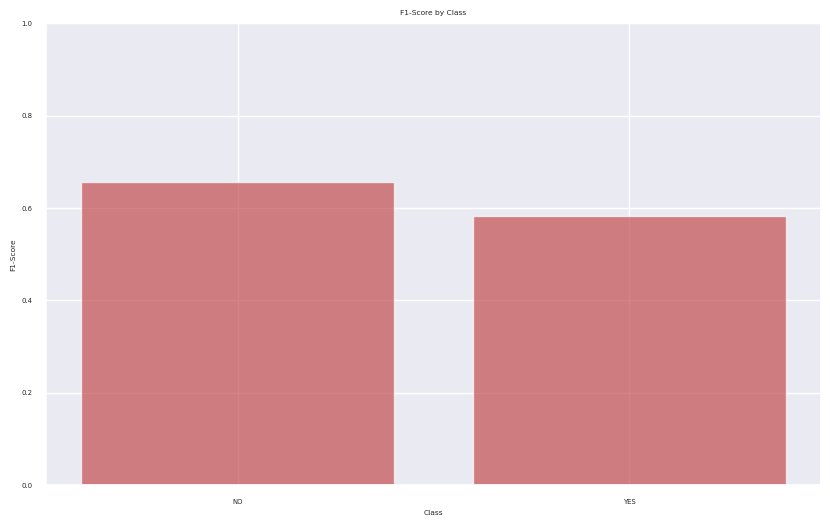

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Example classification report (replace with your actual report)
report = classification_report(Y_test, Yrandforest, target_names=['NO', 'YES'],output_dict=True)
# Convert the dictionary to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame
print(df_report)
# Extract precision, recall, and f1-score for each class
classes = ['NO', 'YES']
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Create a bar plot for precision
plt.figure(figsize=(10, 6))
plt.bar(classes, precision, color='b', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.ylim(0, 1.0)  # Set the y-axis limit for precision (0 to 1)
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(10, 6))
plt.bar(classes, recall, color='g', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.ylim(0, 1.0)  # Set the y-axis limit for recall (0 to 1)
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_score, color='r', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.ylim(0, 1.0)  # Set the y-axis limit for F1-Score (0 to 1)
plt.show()


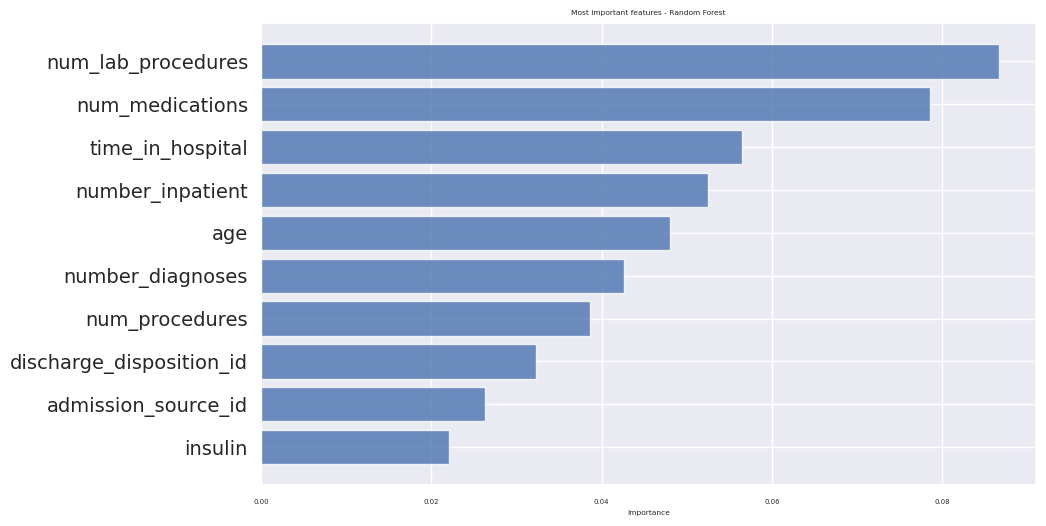

In [ ]:
#Determining which features are most important,
feature_names = X_train.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# AdaBoosted Classification model

In [ ]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(X_train_res, Y_train_res)
yadaclas = adaclass.predict(X_test)

In [ ]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(X_test, Y_test))

The accurary of AdaBoosted Classification model:  0.617890816360769


In [ ]:
#Checking the confusion matrix,
print(confusion_matrix(Y_test, yadaclas))

[[11966  3788]
 [ 7600  6449]]


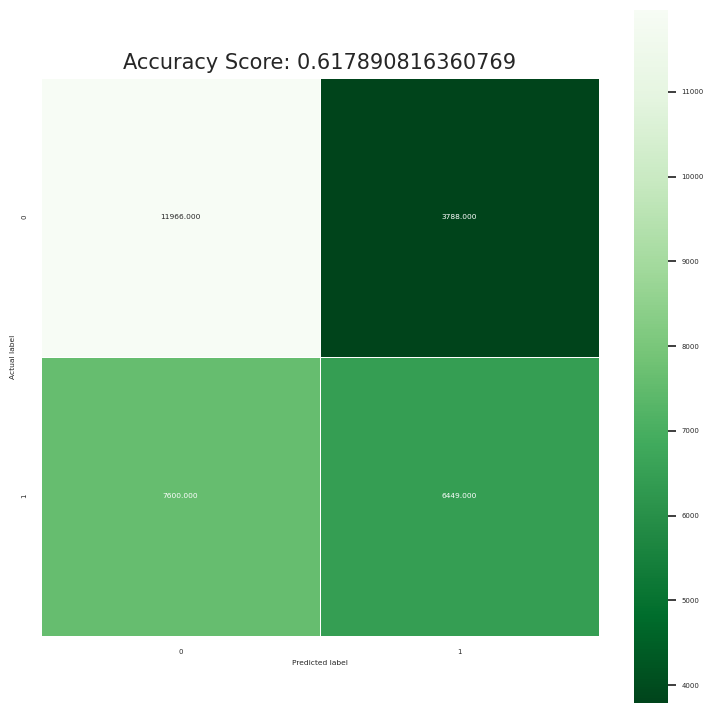

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Y_test, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(X_test, Y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
#Checking recall, f1 :-
print(classification_report(Y_test, yadaclas, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.76      0.68     15754
         YES       0.63      0.46      0.53     14049

    accuracy                           0.62     29803
   macro avg       0.62      0.61      0.60     29803
weighted avg       0.62      0.62      0.61     29803



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import sklearn.model_selection



In [ ]:
# calculate the False Positive and True Positive rate to get the ROC curve
yadaclas = adaclass.decision_function(X_test)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Y_test, yadaclas)

##### The accuracy can be improved by tuning the model, so let's do that.

# Hyperparameters Tunning for AdaBoosted

In [ ]:
# Doing parameter tuning,
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam ={
        'n_estimators': [100, 200,500],
        'learning_rate': [0.2,0.5,1.0],
},
adagrid = GridSearchCV(ada_boost, cv=3, n_jobs=3, param_grid=gridparam)
adagrid.fit(X_train_res, Y_train_res)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(learning_rate=0.2, n_estimators=20,
                                          random_state=123),
             n_jobs=3,
             param_grid=({'learning_rate': [0.2, 0.5, 1.0],
                          'n_estimators': [100, 200, 500]},))

In [ ]:
#The accuracy of the model with the best parameters
adagrid.score(X_test, Y_test)

0.6261785726269168

In [ ]:
gridyada = adagrid.predict(X_test)
print(classification_report(Y_test, gridyada, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.69      0.66     15754
         YES       0.61      0.56      0.58     14049

    accuracy                           0.63     29803
   macro avg       0.62      0.62      0.62     29803
weighted avg       0.63      0.63      0.62     29803



In [ ]:
ygridadascore = adagrid.decision_function(X_test)
fpr_adamod, tpr_adamod, thresholds_grid_ada = roc_curve(Y_test, ygridadascore)

# Decision tree

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # Corrected import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your training and test data (Xtrain, Ytrain, Xtest, Ytest)

# Create and fit a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_res, Y_train_res)

# Make predictions on the test data
Ydecision_tree_pred = decision_tree_model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(Y_test, Ydecision_tree_pred)

# Print the confusion matrix
print("Confusion Matrix for Decision Tree:")
print(confusion)


Confusion Matrix for Decision Tree:
[[8989 6765]
 [6604 7445]]


In [ ]:
decisiontree_accuracy = accuracy_score(Y_test, Ydecision_tree_pred)

# Print the accuracy
print("Accuracy of Decision Tree:", decisiontree_accuracy)



Accuracy of Decision Tree: 0.5514209978861189


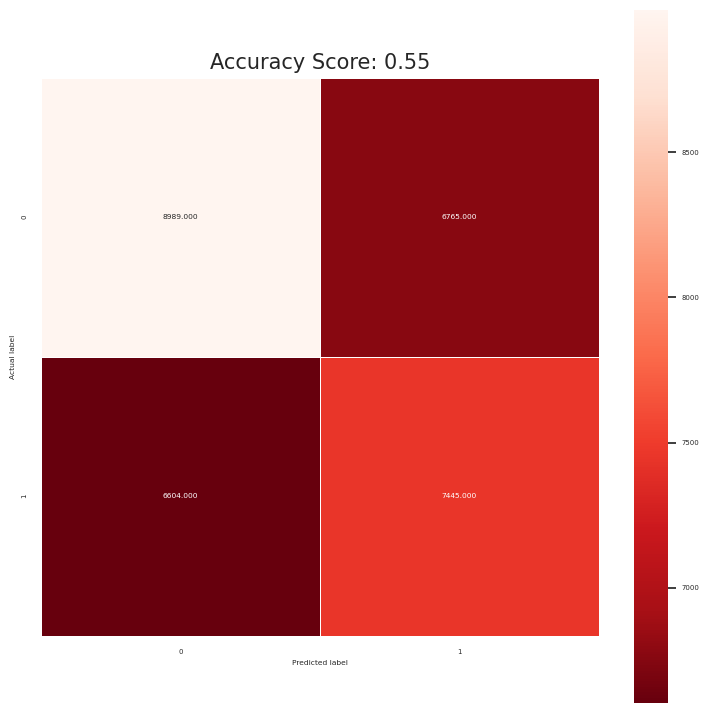

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(9, 9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(decision_tree_model.score(X_test, Y_test))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
report = classification_report(Y_test, Ydecision_tree_pred, target_names=['NO', 'YES'])

# Print the classification report
print("Classification Report for Decision Tree:")
print(report)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          NO       0.58      0.57      0.57     15754
         YES       0.52      0.53      0.53     14049

    accuracy                           0.55     29803
   macro avg       0.55      0.55      0.55     29803
weighted avg       0.55      0.55      0.55     29803



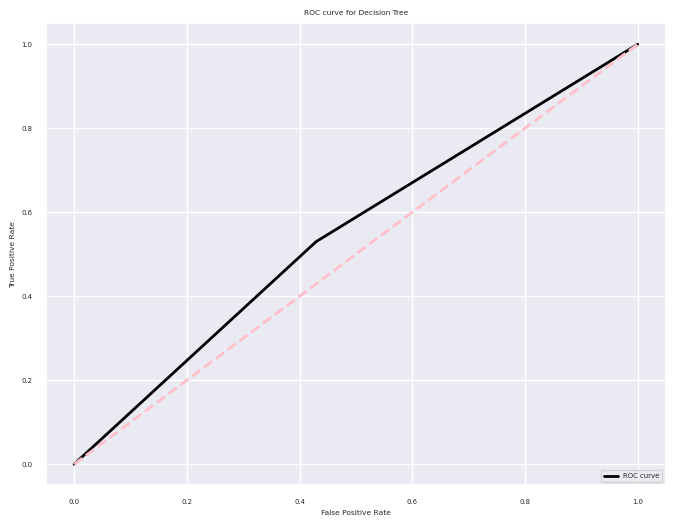

In [ ]:

# Calculate decision function scores
decision_scores = decision_tree_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(Y_test, decision_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Singlelayer Perceptron

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume you have a dataset with features (X) and labels (y)
# X should be a 2D array where each row represents a data point, and y is a 1D array of labels (0 or 1).

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a single-layer perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)

# Fit the model on the training data
perceptron.fit(X_train_res, Y_train_res)

# Make predictions on the test data
Y_pred = perceptron.predict(X_test)

# Evaluate the model
singlelayerperceptron_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {singlelayerperceptron_accuracy:.2f}')

# Display classification report
print(classification_report(Y_test, Y_pred))


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.54      0.98      0.69     15657
           1       0.76      0.07      0.12     14146

    accuracy                           0.55     29803
   macro avg       0.65      0.52      0.41     29803
weighted avg       0.64      0.55      0.42     29803



# Multilayer Perceptron

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume you have a dataset with features (X) and labels (y)
# X should be a 2D array where each row represents a data point, and y is a 1D array of labels (0 or 1).

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model on the training data
mlp.fit(X_train_res, Y_train_res)

# Make predictions on the test data
Y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.78


              precision    recall  f1-score      support
NO             0.772109  0.823593  0.797021  15657.00000
YES            0.789192  0.730949  0.758955  14146.00000
accuracy       0.779620  0.779620  0.779620      0.77962
macro avg      0.780651  0.777271  0.777988  29803.00000
weighted avg   0.780218  0.779620  0.778953  29803.00000


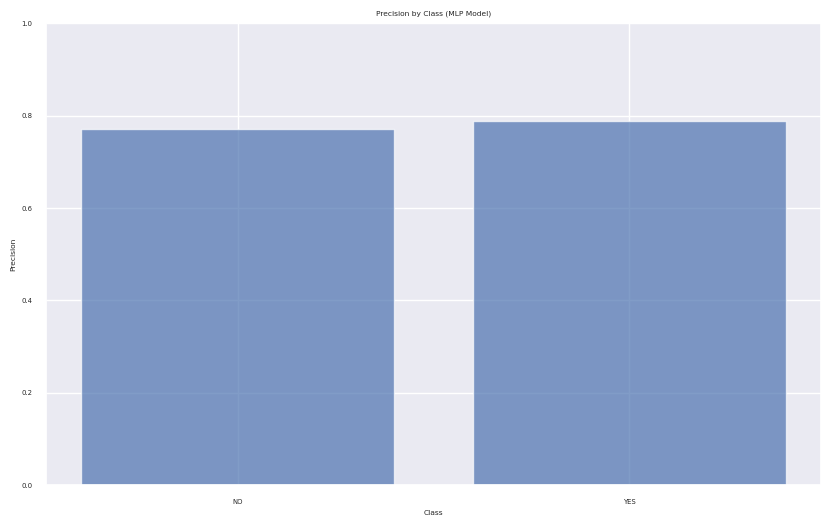

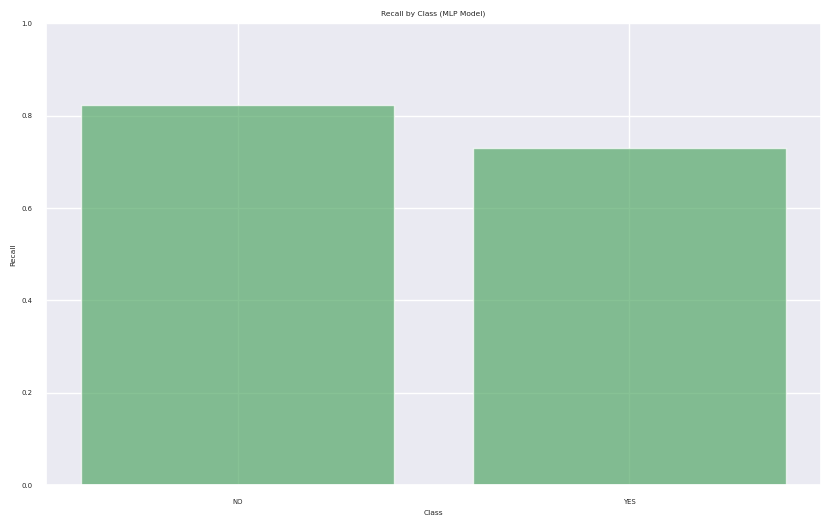

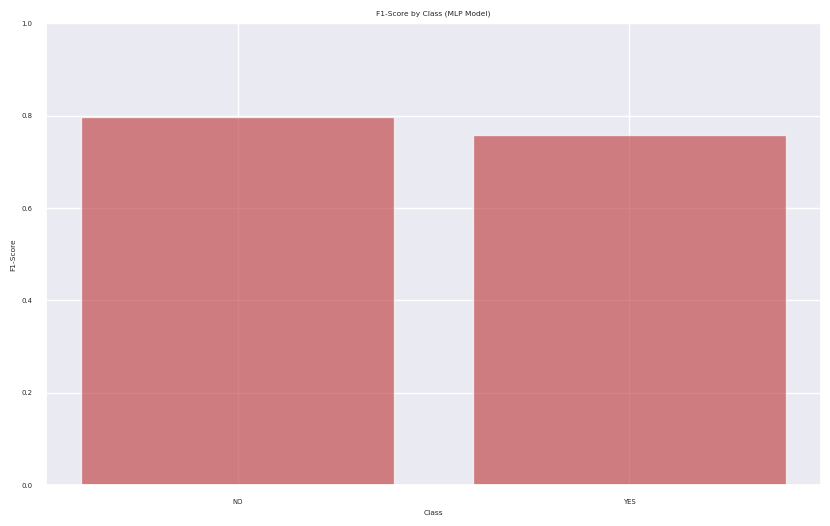

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Example classification report for MLP model (replace with your actual report)
report_mlp = classification_report(Y_test, Y_pred, target_names=['NO', 'YES'], output_dict=True)

# Convert the dictionary to a DataFrame
df_report_mlp = pd.DataFrame(report_mlp).transpose()

# Display the DataFrame
print(df_report_mlp)

# Extract precision, recall, and f1-score for each class
classes = ['NO', 'YES']
precision_mlp = [report_mlp[class_name]['precision'] for class_name in classes]
recall_mlp = [report_mlp[class_name]['recall'] for class_name in classes]
f1_score_mlp = [report_mlp[class_name]['f1-score'] for class_name in classes]

# Create a bar plot for precision for MLP model
plt.figure(figsize=(10, 6))
plt.bar(classes, precision_mlp, color='b', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision by Class (MLP Model)')
plt.ylim(0, 1.0)  # Set the y-axis limit for precision (0 to 1)
plt.show()

# Create a bar plot for recall for MLP model
plt.figure(figsize=(10, 6))
plt.bar(classes, recall_mlp, color='g', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall by Class (MLP Model)')
plt.ylim(0, 1.0)  # Set the y-axis limit for recall (0 to 1)
plt.show()

# Create a bar plot for F1-score for MLP model
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_score_mlp, color='r', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class (MLP Model)')
plt.ylim(0, 1.0)  # Set the y-axis limit for F1-Score (0 to 1)
plt.show()

[[12895  2762]
 [ 3806 10340]]


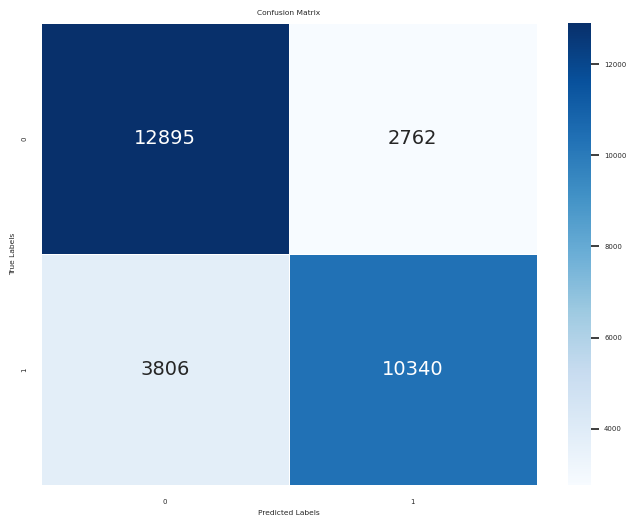

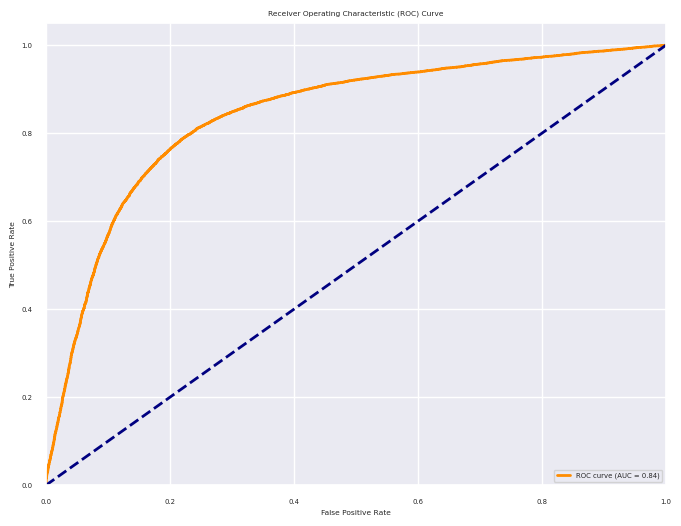

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 14})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate predicted probabilities for the positive class
Y_probas = mlp.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(Y_test, Y_probas)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()







# Comparing the models

In [ ]:

print("Accuracy score of Base Model ", sc.score(X_test, Y_test)*100)
print("Accuracy of Naive Bayes model:" ,naive_bayes_model.score(X_test, Y_test)*100)
print("Accuracy of Logistic regression model:" ,logisticreg.score(X_test, Y_test)*100)
print("Accuracy of Random forest classification: ", random_forest_accuracy*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(X_test, Y_test)*100)
print("Accuracy of Hyperparameter Tuning AdaBoosted Classification model: ", adagrid.score(X_test, Y_test)*100)
print( "Accuracy of Decision Tree model ", decisiontree_accuracy*100)
print( "Accuracy of Single Layer Perceptron model ", singlelayerperceptron_accuracy*100)
print( "Accuracy of  Multilayer Perceptron model ", accuracy*100)



Accuracy score of Base Model  62.4970640539543
Accuracy of Naive Bayes model: 52.71952488004563
Accuracy of Logistic regression model: 61.98369291682045
Accuracy of Random forest classification:  62.292386672482635
Accuracy of AdaBoosted Classification model:  62.06757708955474
Accuracy of Hyperparameter Tuning AdaBoosted Classification model:  63.18491427037547
Accuracy of Decision Tree model  55.14209978861189
Accuracy of Single Layer Perceptron model  54.662282320571755
Accuracy of  Multilayer Perceptron model  77.96195013924773


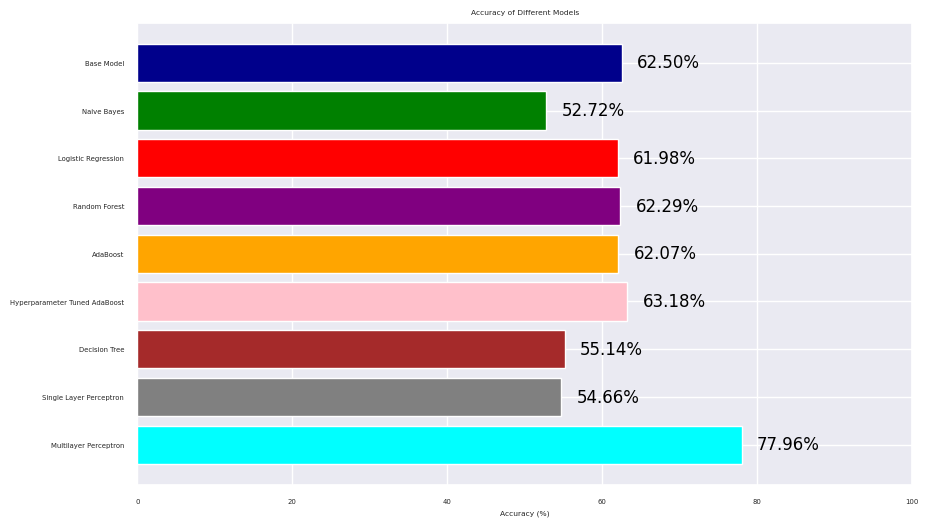

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for different models
model_names = ["Base Model", "Naive Bayes", "Logistic Regression", "Random Forest", "AdaBoost", "Hyperparameter Tuned AdaBoost", "Decision Tree","Single Layer Perceptron","Multilayer Perceptron"]
accuracy_values = [sc.score(X_test, Y_test) * 100, naive_bayes_model.score(X_test, Y_test)*100, logisticreg.score(X_test, Y_test)*100,random_forest_accuracy*100, adaclass.score(X_test, Y_test)*100,adagrid.score(X_test, Y_test)*100, decisiontree_accuracy*100,singlelayerperceptron_accuracy*100,accuracy*100]
colors = ['darkblue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
# Create a bar chart to plot the accuracy of each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_values, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.xlim(0, 100)  # Set the x-axis limit to 100% for accuracy
plt.gca().invert_yaxis()  # Invert the y-axis to display the best model at the top

# Display the accuracy values on the bars
for i, v in enumerate(accuracy_values):
    plt.text(v + 2, i, f'{v:.2f}%', va='center', fontsize=12, color='black')

plt.show()


# Summary


In the evaluation of various machine learning models, it is evident that
the Multilayer Perceptron (MLP) model stands out as the top performer, achieving an impressive accuracy rate of 77.96%. This signifies its superior ability to capture intricate patterns within the data, making it the preferred choice for the given task.Following closely are the AdaBoosted Classification and the Random Forest models, both exhibiting accuracies above 62%. In contrast, models like Naive Bayes and Decision Tree demonstrated comparatively lower accuracy rates. These results highlight the importance of selecting the appropriate model, and in this case, the MLP model excels in predictive performance.The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different models.



